In [19]:
import pandas as pd
import requests
import zipfile
import io
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

# Approach 1 - Get the url and using zipfile library we can directly unzip and extract all the file in the zip folder

In [3]:
# url = 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'
# response = requests.get(url)

# # Step 2: Extract the zip file
# with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
#     thezip.extractall()
# df = pd.read_csv('complaints.csv')

# Approach 2 - Downloading zip file and reading the csv file

In [4]:
#Read a csv File
df = pd.read_csv('complaints.csv')

C:\Users\nithishsha\AppData\Local\Temp\ipykernel_14040\3510204512.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


In [5]:
df.head()# Top 5 rows

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-03-13,Credit card,General-purpose credit card or charge card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,I formally request the removal of an inaccurat...,NaN,"EQUIFAX, INC.",MO,631XX,NaN,Consent provided,Web,2024-03-13,Closed with non-monetary relief,Yes,NaN,8538710
1,2024-03-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19142,NaN,Consent not provided,Web,2024-03-14,Closed with non-monetary relief,Yes,NaN,8551289
2,2023-10-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92114,NaN,Consent not provided,Web,2023-10-25,Closed with explanation,Yes,NaN,7755832
3,2023-10-25,Mortgage,FHA mortgage,Struggling to pay mortgage,"An existing modification, forbearance plan, sh...",NaN,Company has responded to the consumer and the ...,Specialized Loan Servicing Holdings LLC,CA,956XX,NaN,Other,Web,2023-10-25,Closed with explanation,Yes,NaN,7753166
4,2024-05-02,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Money was not available when promised,NaN,NaN,NaN,Sigue Corp.,TX,78644,NaN,Other,Web,2024-05-02,In progress,Yes,NaN,8916876


In [6]:
df.shape #Row and Column Count

(5243000, 18)

In [7]:
df.describe(include="all")#summary statistics

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,5243000,5243000,5007708,5242997,4506836,1836713,2513137,5243000,5197220,5212775,485917,4201464,5243000,5243000,5242985,5243000,768316,5.243000e+06
unique,4550,21,86,178,272,1492267,11,7220,63,33657,3,4,7,4499,8,2,2,NaN
top,2024-04-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2024-04-24,Closed with explanation,Yes,No,NaN
freq,8214,2163876,3160931,1534862,1017156,7356,2262898,1094863,629941,120483,286553,2099875,4690912,8252,3473372,5184323,619938,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.206961e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.434952e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.268433e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.465787e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.347795e+06


In [8]:
df.describe()#Numerical summary statistics

,Complaint ID
count,5.243000e+06
mean,5.206961e+06
std,2.434952e+06
min,1.000000e+00
25%,3.268433e+06
50%,5.465787e+06
75%,7.347795e+06
max,9.030122e+06


In [9]:
df.columns# Column Header

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [10]:
#Product Count
Product=df["Product"].value_counts()
#Sub-Product Count
Sub_Product=df["Sub-product"].value_counts()
#State Count
State=df["State"].value_counts()

# Vizualization

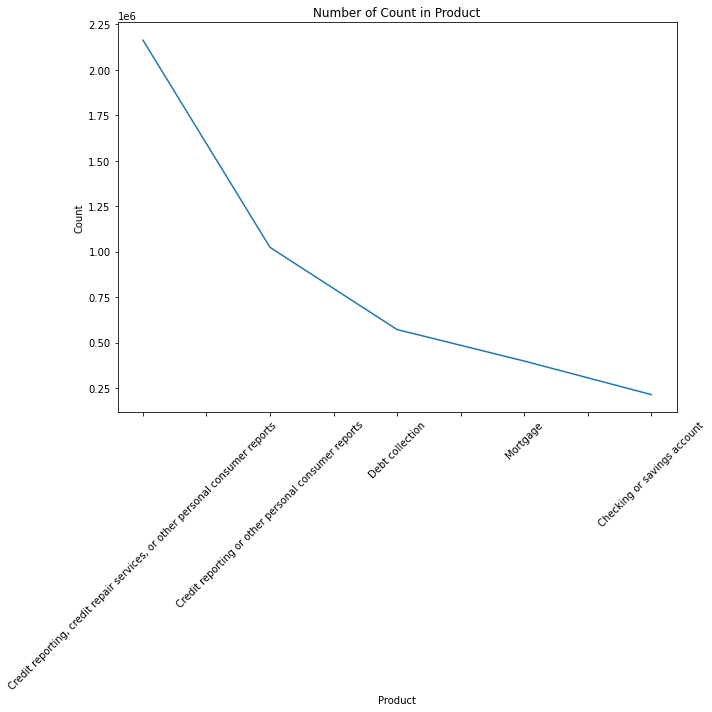

In [15]:
Product=Product.head()
# Plot the data
plt.figure(figsize=(10, 10))
Product.plot(kind='line',x='index', y='values')
plt.title('Number of Count in Product')
plt.xlabel('Product')# X-Axis
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

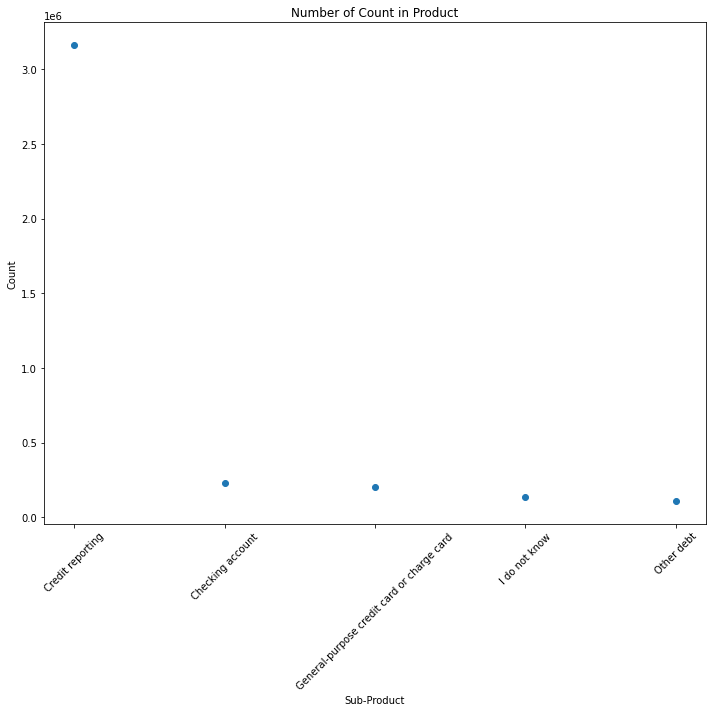

In [17]:
Sub_Product=Sub_Product.head()
plt.figure(figsize=(10, 10))
plt.scatter(x=Sub_Product.index, y=Sub_Product.values)
plt.title('Number of Count in Sub-Product')
plt.xlabel('Sub-Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

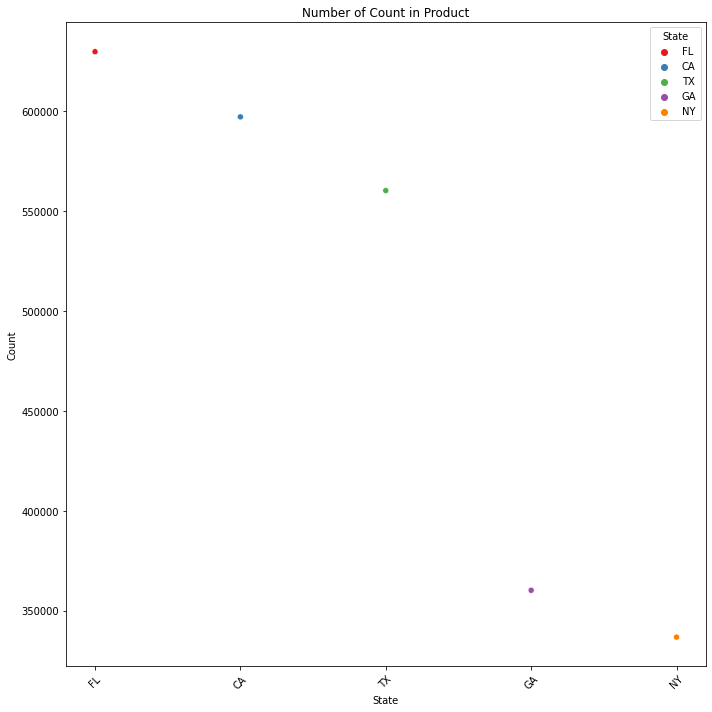

In [21]:
State=State.head()
plt.figure(figsize=(10, 10))
plt.figure(figsize=(10, 10))
sns.scatterplot(data=State, x=State.index, y=State.values, hue='State', palette='Set1')
plt.title('Number of Count in Product')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
#Write it in a excel
with pd.ExcelWriter("Top_Compliant_on_Product_State.xlsx")as writer:
    Product.to_excel(writer,sheet_name="Product",index=False)
    Sub_Product.to_excel(writer,sheet_name="Sub-Product",index=False)
    State.to_excel(writer,sheet_name="State",index=False)

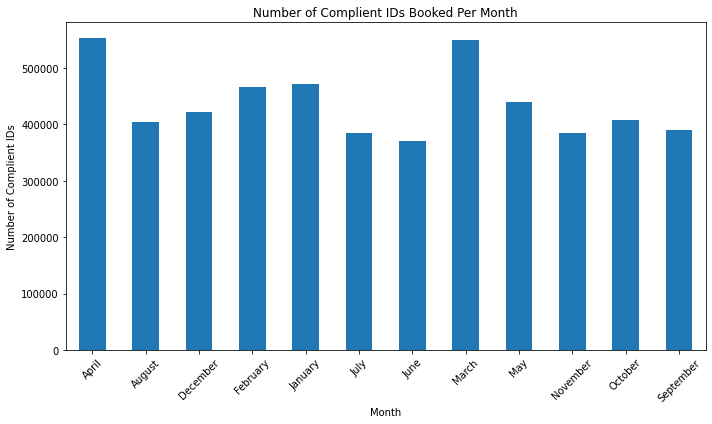

In [36]:
# We Can Analysis which month the company get the Higher Compliant
df["Month"] =pd.to_datetime(df['Date sent to company']).dt.strftime("%B")
monthly_counts = df.groupby('Month')['Complaint ID'].count()

# Plot the data
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')

# Customize the plot
plt.title('Number of Complient IDs Booked Per Month')
plt.xlabel('Month')# X-Axis
plt.ylabel('Number of Complient IDs')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plotw
plt.show()

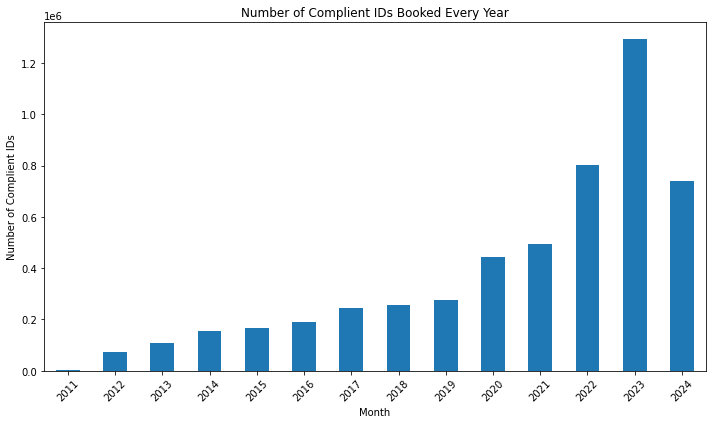

In [37]:
# We Can Also Analysis which Year the company get the Higher Compliant
df["Year"] =pd.to_datetime(df['Date sent to company']).dt.strftime("%Y")
monthly_counts = df.groupby('Year')['Complaint ID'].count()

# Plot the data
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')

# Customize the plot
plt.title('Number of Complient IDs Booked Every Year')
plt.xlabel('Month')# X-Axis
plt.ylabel('Number of Complient IDs')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plotw
plt.show()

# Question 2

# Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 

In [24]:
def find_length(nums):
    if not nums:
        return 0
    max_length = 1
    current_length = 1
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
        else:
            if current_length > max_length:
                max_length = current_length
            current_length = 1
    if current_length > max_length:
        max_length = current_length
    
    return max_length

In [25]:
find_length([1, 3, 5, 4, 7])# Example One

3

In [26]:
find_length([2, 2, 2, 2, 2])#Example Two

1

In [27]:
find_length([1, 2, 7, 9, 2])# Some Extra example

4

In [28]:
find_length([3, 5, 10, 99, 452,567,890,345])# Another Example

7

# Question 3

# Given a list of non negative integers, arrange them such that they form the largest number.

In [29]:
def largestNumber(nums):
    nums_str = list(map(str, nums))
    nums_str.sort(key=lambda x: x*10, reverse=True)
    if nums_str[0] == '0':
        return '0'
    return ''.join(nums_str)

In [30]:
largestNumber([10, 2])

'210'

In [31]:
largestNumber([3, 30, 34, 5, 983,3555,355])

'9835355535534330'

In [32]:
largestNumber([3, 30, 34, 5, 9])

'9534330'

In [33]:
largestNumber([1,2,34,55,676,88])

'88676553421'

# Question 4

# Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python

In [34]:
import json
import csv

with open('DT A1 sample_json.json') as json_file:
    data = json.load(json_file)

with open('servlets.csv', mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["servlet-name", "servlet-class"])
    for servlet in data["web-app"]["servlet"]:
        writer.writerow([servlet["servlet-name"], servlet["servlet-class"]])

In [38]:
#Reading the csv file to view the data
data=pd.read_csv("servlets.csv")
data

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet
